In [46]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

plt.rcParams['figure.figsize'] = (10.0, 8.0)
np.random.seed(100)
A = np.array([[0.990, 0.005, 0.005], [0.005, 0.990, 0.005], [0.005, 0.005, 0.990]])
pi = np.array([1/3, 1/3, 1/3])
Q = np.array([-1, 0, 1])
T = 1000

In [44]:
def Yt(xt):
    return np.random.normal(loc=xt, scale=1.0)

def run_hmm():
    starting_state = np.random.choice(Q,p=pi)
    prev_state = starting_state
    xt = [prev_state]
    yt = [Yt(xt)]
    for t in range(1,T):
        next_state = np.random.choice(Q, p=A[xt[t-1]+1,:])
        xt.append(next_state)
        yt.append(Yt(next_state)) 
    return {'xt': xt, 'yt': yt}

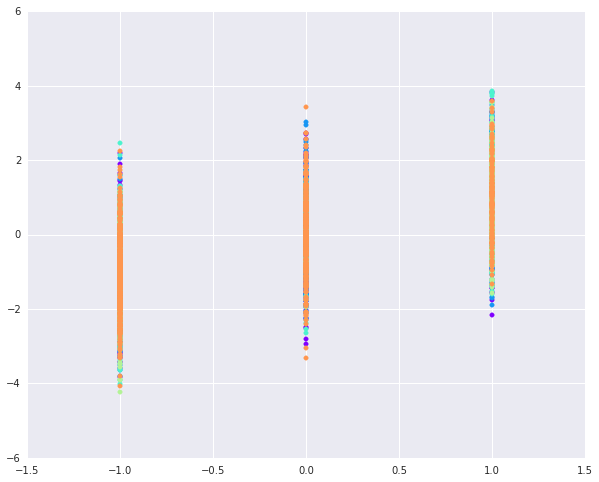

In [49]:
fig = plt.figure()
#ax1 = fig.add_subplot(3,2,1) 
colors = cm.rainbow(np.linspace(0, 1, 6))
for i in range(0,5):
    d = run_hmm()
    #ax = fig.add_subplot(3,2,i)
    xt = d['xt']
    yt = d['yt']
    plt.scatter(xt, yt, color=colors[i])

In [ ]:
def viterbi():
    #todo
    pass